# Probabilistic Seismic Hazard Analysis (PSHA)

Reference: Kramer(1991), Baker(2008)

In [2]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
from matplotlib import pyplot as plt 

# Uncertainity in Magnitude 

<BarContainer object of 39 artists>

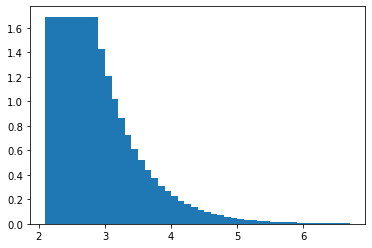

In [13]:
# m_min to m_max
m=np.arange(2.5,6.4,0.1)
m

m_min=min(m);m_max=max(m);b=0.733
prob_m=[]
for i in range(len(m)):
    p_m=(b*math.log(10)*10**(-b*(m[i]-m_min)))/(1-10**(-b*(m_max-m_min)))
    prob_m.append(p_m)
prob_m

plt.bar(m,prob_m)

# Distance (source to site)

In [14]:
import geopy.distance

p1=[(26.85860639,92.1192272),
(26.87410365,92.21811613),
(26.89794144,92.32368675),
(26.91581648,92.43193004),
(26.94560192,92.5067649),
(26.97657043,92.59095413),
(27.00038657,92.6297079),
(27.00753043,92.70320643),
(27.01824536,92.74463288),
(26.99800518,92.8047680),
(26.98490665,92.84619448),
(26.94441065,92.88227558),
(26.93368869,92.93572905),
(26.9134333,92.97581916),(26.08361047,85.16867828),(26.28827108,85.45059588),(26.46894387,85.69450211),(26.64083979,85.93418486)]
p2=(26.42392943,88.20475204)
R=[]

for i in range(len(p1)):
    r=geopy.distance.geodesic(p1[i], p2).km
    R.append(r)
R

[392.7036314230943,
 402.65825383092584,
 413.3734958085934,
 424.2797672054839,
 432.0409886328123,
 440.74997082318043,
 444.89448991434466,
 452.2309431126951,
 456.4590574884836,
 462.1059169956505,
 466.01910401733704,
 469.08648448796725,
 474.24493688987496,
 477.98846919158814,
 305.63561879744816,
 275.308429202086,
 250.40864251675043,
 227.55901174680616]

# Uncertainity in Distance 

In [15]:

r_min=min(R);ls=92;
prob_R=[]

for i in range(len(R)):
    if R[i]>r_min:
        p_r=2*R[i]/(ls*(math.sqrt(R[i]**2-r_min**2)));
        prob_R.append(p_r);
    if R[i]==r_min:
        p_r=1
        prob_R.append(p_r)
prob_R


[0.026673933142451284,
 0.026350659705314153,
 0.026039873157754655,
 0.025757238630245045,
 0.025574036361270598,
 0.02538407952404898,
 0.02529896487598224,
 0.025155946500929956,
 0.025077675049715555,
 0.024977546346885343,
 0.024910953110652397,
 0.0248602735418754,
 0.024777916325844352,
 0.024720301266239243,
 0.03256437776886958,
 0.038623433574507086,
 0.05208979343170226,
 1]

In [ ]:
r_min=min(R);ls=92;
prob_R=[]

for i in range(len(sources)):
    for i in range(len(R)):
        if R[i]>r_min:
            p_r=2*R[i]/(ls*(math.sqrt(R[i]**2-r_min**2)));
            prob_R.append(p_r);
        if R[i]==r_min:
            p_r=1
            prob_R.append(p_r)
prob_R

In [10]:
# distances between source and site of interest 

lat_s=np.array([34.0327,34.0031,34.0253,33.988,33.9683,33.9787])
long_s=np.array([-118.335,-118.2447,-118.1864,-118.1674,-118.1664,-118.0999])
p1=np.array([[-118.335,34.0327],[-118.2447,34.0031],[-118.1864,34.0253],[-118.1674,33.988],[-118.1664,33.9683],[-118.0999,33.9787]])
p2=np.array([-118.4142,33.9426])
print(len(p1))
R=[]

    
p1[0]

6


array([-118.335 ,   34.0327])

# Ground Motion Intensity and Probability of Exceedance of Ground Motion

In [182]:
std_dev_gmm=0.57
pga=np.empty((6,45))
prob_ex=np.empty((6,45))
for i in range(len(m)):
    for j in range(len(R)):
         
        pga[j,i]=-0.152+0.859*m[i]-1.803*math.log(R[j]+25);
        prob_ex[j,i]=1-norm.cdf((math.log(0.1)-pga[j,i])/std_dev_gmm);


In [18]:
x=np.arange(0.1,1,0.1);

std_dev_gmm=0.57
pga=np.empty((len(R),len(prob_m)))
prob_ex=np.empty((len(R),len(prob_m),len(x)))

# Ground Motion Parameter using single GMM (Cornell)
for i in range(len(m)):
    for j in range(len(R)):
        pga[j,i]=-0.152+0.859*m[i]-1.803*math.log(R[j]+25);
pga[:,0]

# Prob of exceedance of ground motion parameter

for i in range(len(x)):
    for j in range(len(m)):
        for k in range(len(R)):
            prob_ex[k,j,i]=1-norm.cdf((math.log(x[i])-pga[k,j])/std_dev_gmm);
prob_ex[:,:,0]  

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.11022302e-16, 3.33066907e-16,
        1.11022302e-15, 3.55271368e-15, 1.17683641e-14, 3.73034936e-14,
        1.16129328e-13, 3.53495011e-13, 1.05215836e-12, 3.06310532e-12,
        8.72069084e-12, 2.42810216e-11, 6.61182220e-11, 1.76084924e-10,
        4.58647453e-10, 1.16842525e-09, 2.91137547e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       

In [203]:
x=np.arange(0.1,1,0.1);

std_dev_gmm=0.57
pga=np.empty(len(prob_m))
prob_ex=np.empty((45,len(x)))


for j in range(len(m)):
        pga[j]=-0.152+0.859*m[j]-1.803*math.log(R[0]+25);
    

for i in range(len(x)):
    for j in range(len(m)):
        prob_ex[j,i]=1-norm.cdf((math.log(x[i])-pga[j])/std_dev_gmm);
        

# Combining Uncertainities 

In [132]:
# for a single source and single distance

freq_1=np.empty((len(m),len(x)))

for i in range(len(x)):
    for j in range(len(m)):
        
        freq_1[j,i]=0.01*prob_m[j]*1*prob_ex[j,i]
        
freq_1

array([[5.85750609e-06, 4.52709403e-08, 1.36714579e-09, 8.48094865e-11,
        8.27653747e-12, 1.10643859e-12, 1.86698618e-13, 3.77199170e-14,
        8.80080555e-15],
       [9.06303923e-06, 8.33120677e-08, 2.78957675e-09, 1.86296693e-10,
        1.92557342e-11, 2.69823447e-12, 4.73815112e-13, 9.90978460e-14,
        2.38385337e-14],
       [1.37299045e-05, 1.50022824e-07, 5.56837967e-09, 4.00297791e-10,
        4.38184785e-11, 6.43569746e-12, 1.17604492e-12, 2.54618539e-13,
        6.31477246e-14],
       [2.03677330e-05, 2.64357984e-07, 1.08743590e-08, 8.41380100e-10,
        9.75330578e-11, 1.50136172e-11, 2.85493081e-12, 6.39818148e-13,
        1.63594939e-13],
       [2.95905537e-05, 4.55868817e-07, 2.07769292e-08, 1.73000316e-09,
        2.12351819e-10, 3.42578071e-11, 6.77848831e-12, 1.57244082e-12,
        4.14495720e-13],
       [4.21073292e-05, 7.69358301e-07, 3.88402414e-08, 3.47986869e-09,
        4.52254455e-10, 7.64591842e-11, 1.57414976e-11, 3.77965825e-12,
        1.0

In [19]:
# For a single source invloving both prob_m and prob_R

freq_1=np.empty((len(prob_R),len(prob_m),len(x)))
x=np.arange(0.1,1,0.1);

for i in range(len(x)):
    for j in range(len(prob_m)):
        for k in range(len(prob_R)):
        
            freq_1[k,j,i]=0.01*prob_m[j]*prob_R[k]*prob_ex[k,j,i]

freq_1

freq_ex=[]
for i in range(len(x)):
    f=freq_1[:,:,i]
    f_ex=sum(sum(f[:]))
    freq_ex.append(f_ex)
freq_ex

[7.881513774797771e-10,
 1.4189980383676854e-12,
 1.8592411597303485e-14,
 6.417144579266115e-16,
 3.9860912417182095e-17,
 3.691101624608304e-18,
 4.607122587308887e-19,
 6.534616456141426e-20,
 1.2871209698620724e-20]

In [ ]:
# For a multiple sources invloving both prob_m and prob_R

freq_1=np.empty((len(prob_R),len(prob_m),len(x)))
x=np.arange(0.1,1,0.1);

for i in range(len(x)):
    for j in range(len(prob_m)):
        for k in range(len(prob_R)):
        
            freq_1[k,j,i]=0.01*prob_m[j]*prob_R[k]*prob_ex[k,j,i]

freq_1

freq_ex=[]
for i in range(len(x)):
    f=freq_1[:,:,i]
    f_ex=sum(sum(f[:]))
    freq_ex.append(f_ex)
freq_ex

# Seismic Hazard Curve 

Text(0, 0.5, 'Frequency of Exceedance ')

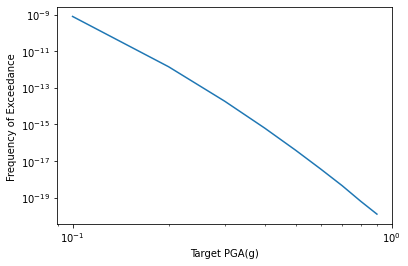

In [20]:
# Seimsic hazard curve at a particular site of interest

plt.plot(x,freq_ex)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Target PGA(g)');plt.ylabel('Frequency of Exceedance ')



# PGA values at interested exceedance levels

In [291]:
# for 2% freq_ex=0.0004 Maximum consideredearthquake (MCE)= 2475 years
# for 10% freq_ex=0.00211 Contingency level earthquake (CLE)= 475 years

In [21]:

# need x to be in inc order
fr=sorted(freq_ex)
print(fr)

# change target pga to match new sorted fr
x_rev=np.flip(x)
x_rev

# interpolate to get PGA correspoding to any particular frequency of exceedance

# for 2%
pga_2percent=np.interp(0.0004,fr,x_rev)

# for 10%
pga_10percent=np.interp(0.00211,fr,x_rev)

print(f"At the site of interest PGA for 2% and 10% probability of exceeedance in 50 years is :{round(pga_2percent,3)}g and {round(pga_10percent,3)}g")

[1.2871209698620724e-20, 6.534616456141426e-20, 4.607122587308887e-19, 3.691101624608304e-18, 3.9860912417182095e-17, 6.417144579266115e-16, 1.8592411597303485e-14, 1.4189980383676854e-12, 7.881513774797771e-10]
At the site of interest PGA for 2% and 10% probability of exceeedance in 50 years is :0.1g and 0.1g
